In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scaler import StandardScaler
from  sample_data_logistic_reg import load_sample_data
from logistic_regression import LogisticRegressionScratch

In [20]:
# Data 
import pandas as pd

X, y = load_sample_data()
df = pd.DataFrame(
    X,
    columns=["Feature_1", "Feature_2"]
)

df["Target"] = y
df

,Feature_1,Feature_2,Target
0,1.0,1.0,0
1,1.0,2.0,0
2,2.0,1.0,0
3,2.0,2.0,0
4,2.0,3.0,0
5,3.0,2.0,0
6,3.0,3.0,0
7,3.0,4.0,1
8,4.0,3.0,1
9,4.0,4.0,1


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.2869
Iteration 200, Loss: 0.2582
Iteration 300, Loss: 0.2470
Iteration 400, Loss: 0.2410
Iteration 500, Loss: 0.2372
Iteration 600, Loss: 0.2346
Iteration 700, Loss: 0.2325
Iteration 800, Loss: 0.2309
Iteration 900, Loss: 0.2295
Accuracy: 0.8947368421052632
Predictions: [0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
Probabilities: [0.007 0.028 0.011 0.047 0.174 0.077 0.264 0.608 0.379 0.725 0.919 0.817
 0.951 0.97  0.993 0.996 0.999 0.999 1.   ]


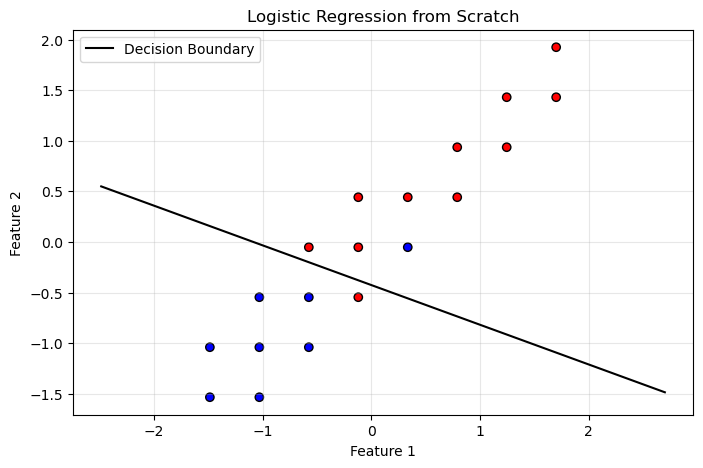

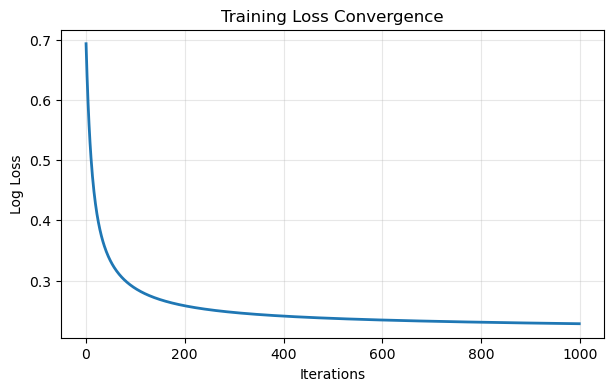

In [18]:
# Logistic Regression Implementation

# Load data
X, y = load_sample_data()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegressionScratch(
    learning_rate=0.1,
    n_iter=1000,
    verbose=True
)
model.fit(X_scaled, y)

# Predictions (class labels)
y_pred = model.predict(X_scaled)
misclassified = y_pred != y

# Probabilities
y_prob = model.get_probabilities(X_scaled)

# Evaluation
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)
print("Predictions:", y_pred)
print("Probabilities:", np.round(y_prob, 3))

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="bwr", edgecolor="k")

# Decision boundary: w1*x1 + w2*x2 + b = 0
x1_vals = np.linspace(
    X_scaled[:, 0].min() - 1,
    X_scaled[:, 0].max() + 1,
    100
)

x2_vals = -(model.weights[0] * x1_vals + model.bias) / model.weights[1]

plt.plot(x1_vals, x2_vals, color="black", label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression from Scratch")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Loss Curve

plt.figure(figsize=(7, 4))
plt.plot(model.losses, linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Training Loss Convergence")
plt.grid(alpha=0.3)
plt.show()

